<a href="https://colab.research.google.com/github/SonyaKirsanova/Computer-Vision-tasks/blob/main/%D0%91%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D0%B2_Torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#возвращает сумму (x.sum()) элементов тензора X, строго превышающих значение limit, которое является входным значением
import torch
X = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
limit = int(input())
larger_than_limit_sum = X[X > limit].sum()
print(larger_than_limit_sum)

3
tensor(39)


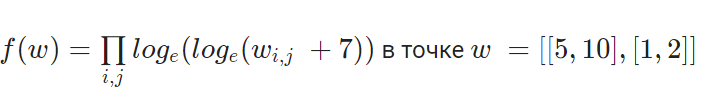

In [2]:
# расчет градиента для функции выше
import torch
w = torch.tensor(
    [[5., 10.],
     [1., 2.]], requires_grad=True)
device = torch.device('cuda:0' 
                      if torch.cuda.is_available() 
                      else 'cpu')
w = w.to(device)
function = torch.log(torch.log(w + 7)).prod()
function.backward()

In [3]:
# та же функция, начальное приближени: [[5,10],[1,2]] , шаг градиентного спуска alpha=0.001. Найти приближение при t = 500
import torch
w = torch.tensor([[5., 10.], [1., 2.]], requires_grad=True)
alpha = 0.001
for _ in range(500):
    # it's critical to calculate function inside the loop:
    function = (w + 7).log().log().prod()
    function.backward()
    w.data -= alpha * w.grad
    w.grad.zero_()

In [ ]:
# тоже самое, только с использованием torch.optim.SGD

import torch
w = torch.tensor([[5., 10.], [1., 2.]], requires_grad=True)
alpha = 0.001
optimizer = torch.optim.SGD([w], lr=0.001)
for _ in range(500):
    # it's critical to calculate function inside the loop:
    function = (w + 7).log().log().prod()
    function.backward()
    optimizer.step()
    optimizer.zero_grad()